In [2]:
using QuadGK

In [3]:
integrand(x, n) = x^n * exp(-x)

integrand (generic function with 1 method)

In [4]:

n=1
quadgk(x->integrand(x,n),0,1)

(0.26424111765711533, 0.0)

In [5]:
n=20
quadgk_count(x -> integrand(x, n), 0.0, 1.0)

(0.018350467697256213, 9.375208015196608e-11, 45)

In [6]:

np = 22
res1 = zeros(np)
res2 = zeros(np);

In [7]:

t_quadgk = @elapsed for n = 1:np
    res1[n] = quadgk(x -> integrand(x, n), 0.0, 1.0)[1]
end

0.169967247

In [8]:

# run this cell twice to exclude the compilation time
res2[1] = 1.0 - 2*exp(-1.0)
t_recur = @elapsed for n = 2:np
    res2[n] = n * res2[n-1] - exp(-1.0)
end

0.005738469

In [9]:
t_quadgk / t_recur

29.618918739475628

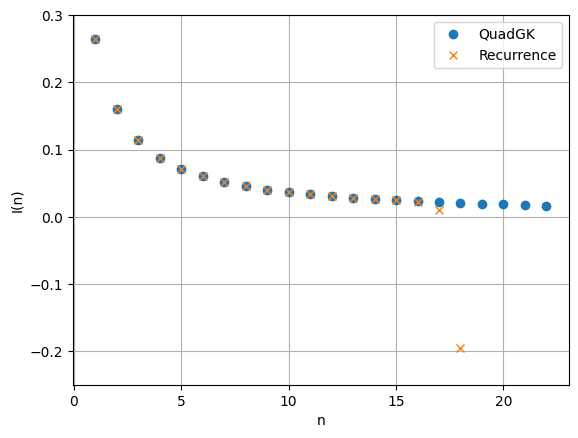

In [10]:
using PyPlot
plot(1:np, res1, marker="o", linestyle="none", label="QuadGK")
plot(1:np, res2, marker="x", linestyle="none", label="Recurrence")
ylim(-0.25, 0.3)
legend()
grid(true)
xlabel("n")
ylabel("I(n)");

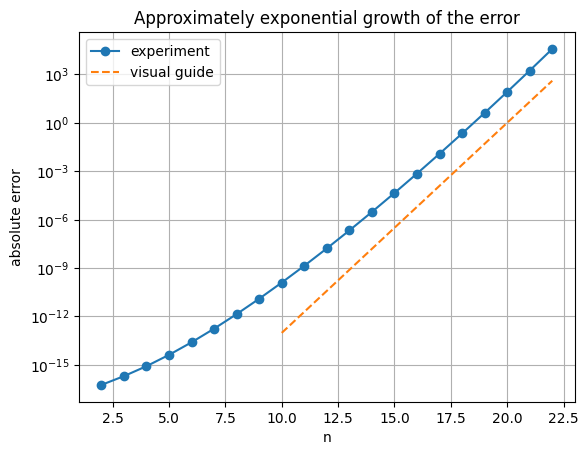

In [11]:

semilogy(2:np, (abs.(res1 .- res2))[2:np], marker="o", label="experiment")
semilogy(10:np, exp(-60) * exp.(3.0 .* (10:np)), linestyle="dashed", label="visual guide")
grid(true)
legend()
xlabel("n")
ylabel("absolute error")
title("Approximately exponential growth of the error");

In [12]:

forward(f, x, h) = (f(x + h) - f(x)) / h
central2(f, x, h) = (f(x + h) - f(x - h)) / (2 * h)
central4(f, x, h) = (-f(x + 2 * h) + 8 * f(x + h) - 8 * f(x - h) + f(x - 2 * h)) / (12 * h);

In [13]:

f(x) = exp(x) + sin(x)
fp(x) = exp(x) + cos(x);

In [14]:

np = 53
dx = 2.0 .^ ((-np):0)
err_f = similar(dx)
err_c2 = similar(dx)
err_c4 = similar(dx);

In [16]:

x0 = 1.0
exact_fpx0 = fp(x0) # exact value of the derivative at x0

for i in 1:(np + 1)
    err_f[i] = abs(forward(f, x0, dx[i]) - exact_fpx0)
    err_c2[i] = abs(central2(f, x0, dx[i]) - exact_fpx0)
    err_c4[i] = abs(central4(f, x0, dx[i]) - exact_fpx0)
end

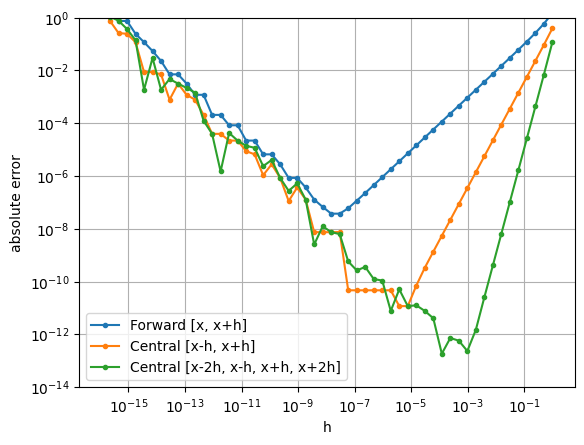

In [17]:

loglog(dx, err_f; marker=".", label="Forward [x, x+h]")
loglog(dx, err_c2; marker=".", label="Central [x-h, x+h]")
loglog(dx, err_c4; marker=".", label="Central [x-2h, x-h, x+h, x+2h]")
legend()
grid(true)
xlabel("h")
ylabel("absolute error")
ylim(1e-14, 1.0);

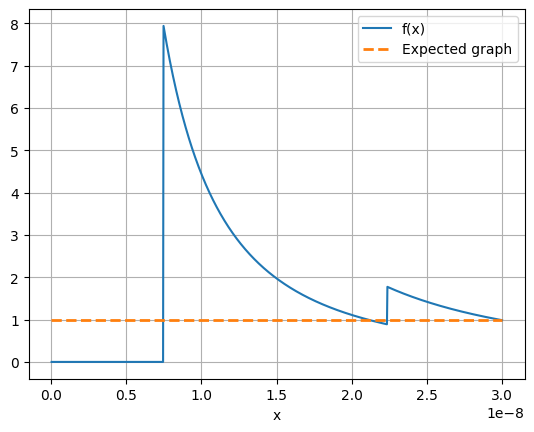

In [19]:
using PyPlot
f(x) = 2*(1/sqrt(1-x^2) - 1)/x^2
x = range(0.0, 3e-8, 1000)
plot(x, f.(x), label="f(x)")
plot(x, 1 .+ 3/4*x .^2, label="Expected graph", linestyle="dashed", linewidth=2)
legend()
grid(true)
xlabel("x");

In [10]:
x1 = sqrt(eps())/2
y1 = nextfloat(x1)

7.45058059692383e-9

In [8]:
1/sqrt(1 - x1^2) 

1.0

In [11]:
x2 = 3/2*sqrt(eps())
y2 = nextfloat(x2)

2.2351741790771488e-8

In [14]:
1/sqrt(1-y2^2) - 1

4.440892098500626e-16

In [15]:
x1

7.450580596923828e-9

In [16]:
x2

2.2351741790771484e-8

In [17]:
2/x1^2 * eps()

8.0

In [20]:
2/x2^2 * 2*eps()

1.7777777777777777